In [29]:
from pandas import Series
from pandas import read_csv
series = Series.from_csv('shear4.csv', header=0)
split_point = len(series) - 20
dataset, validation = series[0:split_point], series[split_point:]
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')
#('Dataset %d, Validation %d' % (len(dataset), len(validation)))
from sklearn.metrics import mean_squared_error
from math import sqrt

seriez =Series.from_csv('dataset.csv')  #this is where you then load the splitted dataset.csv
#the split for train and testing(test harnessing)
X = seriez.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
#Design a walk-forward validation scenario
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    #predict
    yhat = history[-1]
    predictions.append(yhat)
    #observations
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
#report performance
rmse =sqrt(mean_squared_error(test, predictions))
print('RMSE: %3.f' % rmse)

>Predicted=0.440, Expected=  1
>Predicted=0.520, Expected=  1
>Predicted=0.590, Expected=  1
>Predicted=0.730, Expected=  1
>Predicted=0.800, Expected=  1
>Predicted=0.950, Expected=  1
>Predicted=0.910, Expected=  0
>Predicted=0.450, Expected=  1
>Predicted=1.040, Expected=  1
>Predicted=0.640, Expected=  1
>Predicted=0.730, Expected=  1
>Predicted=0.910, Expected=  1
>Predicted=0.800, Expected=  1
>Predicted=1.290, Expected=  1
>Predicted=0.670, Expected=  1
>Predicted=0.590, Expected=  1
>Predicted=0.870, Expected=  1
>Predicted=0.700, Expected=  1
>Predicted=0.830, Expected=  1
>Predicted=0.700, Expected=  1
>Predicted=0.910, Expected=  1
>Predicted=0.800, Expected=  1
>Predicted=1.040, Expected=  1
>Predicted=0.870, Expected=  1
>Predicted=1.230, Expected=  1
>Predicted=0.870, Expected=  1
>Predicted=1.080, Expected=  1
>Predicted=1.040, Expected=  1
>Predicted=1.080, Expected=  1
>Predicted=0.910, Expected=  1
>Predicted=0.870, Expected=  1
>Predicted=0.910, Expected=  1
>Predict

count    700.000000
mean       0.752286
std        0.285763
min        0.000000
25%        0.540000
50%        0.730000
75%        0.910000
max        1.900000
dtype: float64


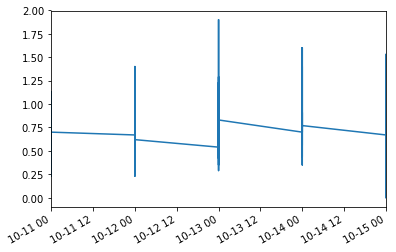

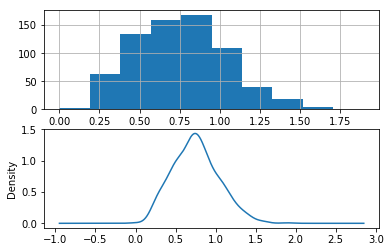

In [30]:
from matplotlib import pyplot
print(seriez.describe()) # from the decription, the SD (avg spread from the mean) is relatively large at 112 roberies
        #the percentile with the SD also suggest a large spread, this will likely make an accurate prediction difficult
seriez.plot() # from these obs, there is obvious trend in the data, we need modeling and removing it.
pyplot.show()
pyplot.figure(1)
pyplot.subplot(211)
seriez.hist()
pyplot.subplot(212)
seriez.plot(kind='kde') #the distribution is not gaussian. Maybe, double-sided or explonensial 
pyplot.show()

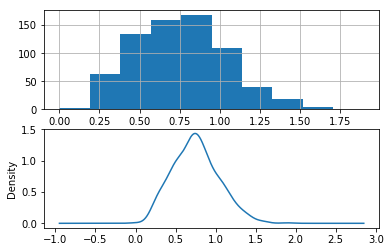

In [31]:
pyplot.figure(1)
pyplot.subplot(211)
seriez.hist()
pyplot.subplot(212)
seriez.plot(kind='kde') #the distribution is not gaussian. Maybe, double-sided or explonensial 
pyplot.show()

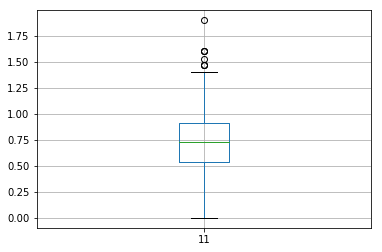

In [32]:
from pandas import DataFrame
from pandas import TimeGrouper
import numpy
#from matplotlib import pyplot
#from pandas import Series
#seriez = Series.from_csv('dataset.csv')
#groups = seriez['6/30/2003':'7/4/2003'].groupby(TimeGrouper('D'))
groups = seriez['10/11/2007':'10/15/2007'].groupby(TimeGrouper(freq='6D'))#.aggregate(numpy.sum)
days = DataFrame()
for name, group in groups:
    days[name.day] = group.values
days.boxplot()
pyplot.show()

	1%: -3.440
	5%: -2.866
	10%: -2.569


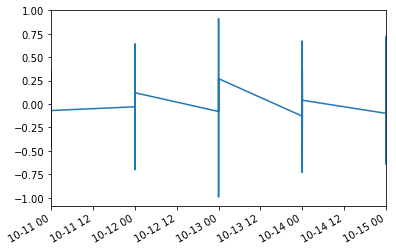

In [33]:
from statsmodels.tsa.stattools import adfuller
#Create a differenced time series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)
#difference data
stationary = difference(X)
stationary.index = seriez.index[1:]
#check for stationary
result = adfuller(stationary)
('ADF Statistics: %f' %result[0])
('p-value: %f' % result[1])
('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
stationary.to_csv('stationary.csv')
stationary.plot()
pyplot.show()

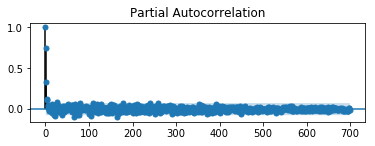

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
seriex = Series.from_csv('dataset.csv')
pyplot.figure()
pyplot.subplot(211)
#plot_acf(seriex, ax=pyplot.gca())
plot_pacf(seriex, ax=pyplot.gca())
pyplot.show()

In [84]:
from math import log
from math import exp
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)

In [35]:
from statsmodels.tsa.arima_model import ARIMA
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
#walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    #predict
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    #implemet the inverse transformed
    #yhat = boxcox_inverse(yhat, lam)
    predictions.append(yhat)
    #observation
    obs = test[i]
    print('>Predicted=%.3f, Expected=%3.f ' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  0 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predicted=0.542, Expected=  1 
>Predict

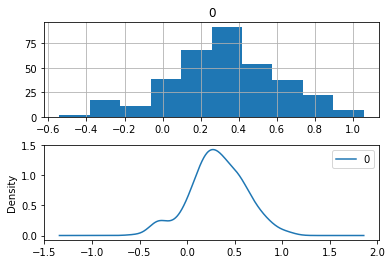

In [36]:
#A good final check of a model is to review residual forecast errors. The distribution should be Gaussian. This can be checked by 
#Plotting the residuals with a Histogram/Density plots. The code cal residual errors and creates Density plots
residuals = [test[i] - predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

                0
count  350.000000
mean     0.320811
std      0.287196
min     -0.542246
25%      0.157754
50%      0.327754
75%      0.527754
max      1.057754


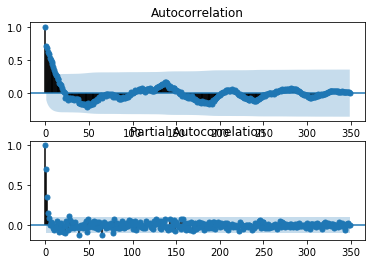

In [37]:
#checking for autocorrelation in the residual error, means re-calculating residual errors and creating ACF/PACF for correl
#significants
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [39]:
from sklearn.metrics import mean_squared_error
bias = 0.320811
for i in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    #observation
    obs = test[i]
    history.append(obs)
    #performance
rmse = [test[i]-predictions[i] for i in range(len(test))]
#rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
residuals = DataFrame(residuals)
print(residuals.describe())
#plot residual errors
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/home/ethels/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


TypeError: must be real number, not list

In [41]:
#Model validation
import numpy
#monkey patch around bug in ARIMA class(I don't understand this)
def __getnewargs__(self):
    return ((self.endog), (self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

series = Series.from_csv('dataset.csv')
X = series.values
X = X.astype('float32')
#fit model
model = ARIMA(X, order=(2,0,2))
model_fit = model.fit(trend='nc', disp=0)
#bias constant could be calculated from in-smaple mean residual
bias = 0.752286
#save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [43]:
from statsmodels.tsa.arima_model import ARIMAResults
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 1.100


>Predicted=1.100, Expected=0.180
>Predicted=0.798, Expected=  0 
>Predicted=0.927, Expected=  1 
>Predicted=1.022, Expected=  1 
>Predicted=0.964, Expected=  0 
>Predicted=0.837, Expected=  0 
>Predicted=0.881, Expected=  0 
>Predicted=0.870, Expected=  0 
>Predicted=0.824, Expected=  0 
>Predicted=0.837, Expected=  0 
>Predicted=0.882, Expected=  0 
>Predicted=0.925, Expected=  0 
>Predicted=0.946, Expected=  0 
>Predicted=0.789, Expected=  0 
>Predicted=0.888, Expected=  0 
>Predicted=0.771, Expected=  0 
>Predicted=0.878, Expected=  0 
>Predicted=0.842, Expected=  0 
>Predicted=0.925, Expected=  0 
>Predicted=0.828, Expected=  0 
RMSE: 0.378


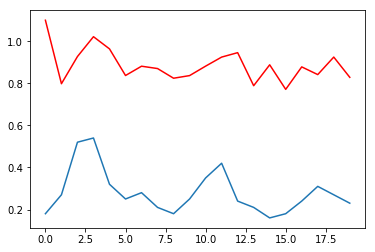

In [44]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
#load the sliced dataset
dataset = Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X] #implementation of rollingForecast
validation = Series.from_csv('validation.csv')
y = validation.values.astype('float32')
#load saved model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
#make the first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[2])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0])) # this is the predicted on test data and validated (every other data)
#implemeting the rolling forecasts on the validated set
for i in range(1, len(y)):
    #predict
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=[0])
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    #observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f ' % (yhat, obs))
    #report performance
rmse = mean_squared_error(y, predictions)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()